# NB: NumPy Continued



## Quick Refresher on Shape

The **shape** of an array is represented a **tuple**, e.g. `(n, m)` for a 2D array.

* The **length** of the tuple is number of **dimensions** (i.e. axes).
* The **values** of the tuple are the number of **elements** in each dimension (axis).

Consider the array `foo`:

In [1]:
import numpy as np

In [2]:
foo = np.ones((6,4))

In [3]:
foo

array([[1., 1., 1., 1.],
       [1., 1., 1., 1.],
       [1., 1., 1., 1.],
       [1., 1., 1., 1.],
       [1., 1., 1., 1.],
       [1., 1., 1., 1.]])

It was created with the $2$ dimensions.
* The first dimension, axis 0, has $6$ elements. In this case, these elements are arrays.
* The second dimension, axis 1, has $4$ elements. Its elements are scalars (numbers in this case).

The shape of `foo[0]` is $4$. It contains $1$ axis with $4$ elements.

In [4]:
foo[0], foo[0].shape

(array([1., 1., 1., 1.]), (4,))

It has a shape of $1$ and not $4 \times 1$ because it is a vector, not a matrix.

**SO, there is a difference between a vector and a 1-column matrix.**

### Reshaping

If we want to make it into a 1-column matrix, we need to reshape it using `np.reshape()`.

Note that the first value of the shape argument is $-1$. This means use the length of the vector that is passed to it. 

In [5]:
## np.reshape?

In [6]:
foo2 = np.reshape(foo[0], (-1, 1))

In [7]:
foo2, foo2.shape

(array([[1.],
        [1.],
        [1.],
        [1.]]),
 (4, 1))

When indexing an array, think of the **positions** of the comma-delimitted tuple as the axis.  

The **values** are the **element offsets** in the containing array. The

In [8]:
foo[2:, 2:]
##   ^   ^ 
##   0   1  <- AXIS NUMBER

array([[1., 1.],
       [1., 1.],
       [1., 1.],
       [1., 1.]])

### Example: The Normal Equation

Sometimes, you need to **convert vectors into 1-column matrices** to make certain linear algebraic functions work.

Consider two random variables, $x$ and $y$. 

In [9]:
x = np.random.randn(100)
y = np.random.randn(100)

We can fit a regression line using the **normal equation**, which appears in this week's homework.

$\begin{aligned} \hat\beta_i=(x^Tx)^{−1}x^Ty \end{aligned}$ 

Here is a standward way of expressing it in NumPy:

In [10]:
get_beta1 = lambda x, y: (np.linalg.inv(x.T.dot(x))) * (x.T.dot(y))

However, it will fail if we pass it our two variables, `x` and `y`.

The reason is that it expects `x` to be a matrix, since it is designed to handle n-dimension predictor variables, usually represented as $\textbf{X}$. 

In [11]:
get_beta1(x, y)

LinAlgError: 0-dimensional array given. Array must be at least two-dimensional

The revised function will work with a vector as `x`:

$\hat\beta_i = \large\frac{1}{x^Tx} \small(x^Ty)$

In [12]:
get_beta2 = lambda x, y: (1 / x.T.dot(x)) * (x.T.dot(y))

In [13]:
get_beta2(x, y)

-0.09119504858881357

We can fix the problem in the general case by converting our vector into a matrix using `np.reshape()`.

In [14]:
x_as_matrix = np.reshape(x, (-1, 1))

In [15]:
get_beta1(x_as_matrix, y)

array([[-0.09119505]])

In [16]:
get_beta1(x_as_matrix, y)[0][0]

-0.09119504858881357

In [17]:
get_beta1(x_as_matrix, y)[0][0] == get_beta2(x, y)

True

One **take-away** here is that there is a difference betweek a scalar value and a 1 x 1 array.

## Broadcasting

What happens when you try to perform an element-wise operation on two arrays of different shape?

NumPy will convert a low-dimensional array into a high-dimensional array to allow the operation to take place.

This is called **broadcasting**.

Let's look at at our array `foo`:

In [18]:
foo

array([[1., 1., 1., 1.],
       [1., 1., 1., 1.],
       [1., 1., 1., 1.],
       [1., 1., 1., 1.],
       [1., 1., 1., 1.],
       [1., 1., 1., 1.]])

If we multiply it by 5, the scalar is converted into an array of the same shape as `foo` with the value 5 broadcast to populate the entire array.

In [19]:
foo * 5

array([[5., 5., 5., 5.],
       [5., 5., 5., 5.],
       [5., 5., 5., 5.],
       [5., 5., 5., 5.],
       [5., 5., 5., 5.],
       [5., 5., 5., 5.]])

If we want to multiply an array by a vector, the vector is broadcast to become a 2D array.

In [20]:
foo * np.array([5, 10, 6, 8])

array([[ 5., 10.,  6.,  8.],
       [ 5., 10.,  6.,  8.],
       [ 5., 10.,  6.,  8.],
       [ 5., 10.,  6.,  8.],
       [ 5., 10.,  6.,  8.],
       [ 5., 10.,  6.,  8.]])

Note that NumPy can't always make the adjustment:

In [21]:
foo * np.array([5, 10])

ValueError: operands could not be broadcast together with shapes (6,4) (2,) 

## Array-Oriented Programming

Using NumPy arrays enables you to express many kinds of data processing tasks as concise array expressions **without writing loops**. 

This practice of **replacing explicit loops with array expressions** is referred to by some people as **vectorization**. 

Vectorized array operations are often significantly **faster** than their pure Python equivalents.

They are also **visually concise and elegant**, although loops have the virtue of visualizing what's under the hood in an algorithm.

## Expressing Conditional Logic as Array Operations

### `np.where()`

The `np.where` function is a vectorized version of the ternary expression `x if condition else y`. 

Suppose we had a boolean array and two arrays of values:

In [22]:
xarr = np.array([1.1, 1.2, 1.3, 1.4, 1.5])
yarr = np.array([2.1, 2.2, 2.3, 2.4, 2.5])
cond = np.array([True, False, True, True, False])

In [23]:
result = [(x if c else y) for x, y, c in zip(xarr, yarr, cond)]

In [24]:
result

[1.1, 2.2, 1.3, 1.4, 2.5]

Here is the vectorized version:

In [25]:
result = np.where(cond, xarr, yarr)

In [26]:
result

array([1.1, 2.2, 1.3, 1.4, 2.5])

In [27]:
arr = np.random.randn(4, 4)

In [28]:
arr

array([[-0.26748997,  0.39631379,  1.46512082,  0.08861336],
       [ 0.48867856, -0.18075189,  1.02316007, -0.40715262],
       [ 0.69034284, -1.49338694, -1.34064244,  0.67265104],
       [-0.27311495,  0.15572094,  0.53793734, -0.34051889]])

In [29]:
arr > 0

array([[False,  True,  True,  True],
       [ True, False,  True, False],
       [ True, False, False,  True],
       [False,  True,  True, False]])

In [30]:
np.where(arr > 0, 2, -2)

array([[-2,  2,  2,  2],
       [ 2, -2,  2, -2],
       [ 2, -2, -2,  2],
       [-2,  2,  2, -2]])

In [31]:
np.where(arr > 0, 2, arr) # set only positive values to 2

array([[-0.26748997,  2.        ,  2.        ,  2.        ],
       [ 2.        , -0.18075189,  2.        , -0.40715262],
       [ 2.        , -1.49338694, -1.34064244,  2.        ],
       [-0.27311495,  2.        ,  2.        , -0.34051889]])

## Mathematical and Statistical Methods

Statistical computations are aggregate functions apply to vectors within an array.

In a 2D array, they can be applied to rows or columns, i.e. **axis $0$ or axis $1$**.

Let's create an array of random values. We can think of it is a table of observations and random variables.

In [32]:
arr = np.random.randn(5, 4)

In [33]:
arr

array([[-1.74320838, -0.73957243,  1.35295036,  0.73407604],
       [-0.88869577, -0.30815018, -0.19764072, -2.11240757],
       [ 0.49595599,  0.66961766, -0.2284396 ,  0.5884474 ],
       [ 1.44665018,  0.15755088,  0.37599187, -1.72342637],
       [-0.08801048,  0.0338154 ,  1.73585633,  0.60019871]])

### `.mean()`

In [34]:
arr.mean()

0.008077965741973437

In [35]:
np.mean(arr)

0.008077965741973437

In [36]:
arr.mean(axis=1)

array([-0.0989386 , -0.87672356,  0.38139536,  0.06419164,  0.57046499])

In [37]:
arr.mean(axis=0)

array([-0.15546169, -0.03734773,  0.60774365, -0.38262236])

### `.sum()`

In [38]:
arr.sum()

0.16155931483946873

Row wise aggregration

In [39]:
arr.sum(axis=0)

array([-0.77730846, -0.18673866,  3.03871823, -1.9131118 ])

In [40]:
arr.mean(axis=1)

array([-0.0989386 , -0.87672356,  0.38139536,  0.06419164,  0.57046499])

Column-wise aggregration

### `.cumsum()`

In [41]:
arr = np.array([0, 1, 2, 3, 4, 5, 6, 7])

In [42]:
arr.cumsum()

array([ 0,  1,  3,  6, 10, 15, 21, 28])

In [43]:
arr = np.array([[0, 1, 2], [3, 4, 5], [6, 7, 8]])

In [44]:
arr

array([[0, 1, 2],
       [3, 4, 5],
       [6, 7, 8]])

In [45]:
arr.cumsum(axis=0)

array([[ 0,  1,  2],
       [ 3,  5,  7],
       [ 9, 12, 15]])

In [46]:
arr.cumprod(axis=1)

array([[  0,   0,   0],
       [  3,  12,  60],
       [  6,  42, 336]])

## Methods for Boolean Arrays

### `.sum()`

Since booleans are $0$s and $1$, we can sum them to get a total truth count.

In [47]:
arr = np.random.randn(100)
(arr > 0).sum() # Number of positive values

56

In [48]:
bools = np.array([False, False, True, False])

### `.any()`

In [49]:
bools.any()

True

### `.all()`

In [50]:
bools.all()

False

## Sorting 

### `.sort()`

In [51]:
arr = np.random.randn(6)

In [52]:
arr

array([ 1.69107994, -1.73453122, -1.31495418,  1.36446031,  0.26821553,
        0.15258427])

In [53]:
arr.sort()

In [54]:
arr

array([-1.73453122, -1.31495418,  0.15258427,  0.26821553,  1.36446031,
        1.69107994])

In [55]:
arr = np.random.randn(5, 3)

In [56]:
arr

array([[ 0.44677599, -0.8258648 , -1.16623886],
       [ 0.2311467 , -1.1582424 ,  1.78654509],
       [ 0.8971764 , -0.17797321, -1.05371955],
       [-0.00804254, -0.83453971,  0.92641509],
       [ 0.72827514, -1.44448107,  1.86963008]])

In [57]:
arr.sort(1)

In [58]:
arr

array([[-1.16623886, -0.8258648 ,  0.44677599],
       [-1.1582424 ,  0.2311467 ,  1.78654509],
       [-1.05371955, -0.17797321,  0.8971764 ],
       [-0.83453971, -0.00804254,  0.92641509],
       [-1.44448107,  0.72827514,  1.86963008]])

Using sort to get a quantile.

In [107]:
large_arr = np.random.randn(1000)

In [109]:
# large_arr

In [110]:
large_arr.sort()

In [112]:
# large_arr

In [59]:
large_arr[int(0.05 * len(large_arr))] # 5% quantile

-1.6089897310078198

In [60]:
0.05 * len(large_arr)

50.0

## Unique and Other Set Logic

### `np.unique()`

In [61]:
names = np.array(['Bob', 'Joe', 'Will', 'Bob', 'Will', 'Joe', 'Joe'])
np.unique(names)

array(['Bob', 'Joe', 'Will'], dtype='<U4')

In [62]:
sorted(set(names))

['Bob', 'Joe', 'Will']

In [63]:
ints = np.array([3, 3, 3, 2, 2, 1, 1, 4, 4])
np.unique(ints)

array([1, 2, 3, 4])

### `np.in1d()`

Tests whether each element of a 1-D array is also present in a second array.

In [64]:
values = np.array([6, 0, 0, 3, 2, 5, 6])
np.in1d(values, [2, 3, 6])

array([ True, False, False,  True,  True, False,  True])

## File Input and Output with Arrays

### `np.save()`

Save an array to a binary file in NumPy ``.npy`` format.

Automatically adds the `.npy` file extension.

In [65]:
arr = np.arange(10)
np.save('some_array', arr)

### `np.load()`

In [66]:
np.load('some_array.npy')

array([0, 1, 2, 3, 4, 5, 6, 7, 8, 9])

### `np.savetxt()`

Save an array to a text file.

In [67]:
## np.savetxt?

In [68]:
np.savetxt('some_array.txt', arr)

In [69]:
## !more some_array.txt

### `np.savez()`

Save several arrays into a single file in uncompressed ``.npz`` format.

In [70]:
np.savez('array_archive.npz', a=arr, b=arr)

In [71]:
arch = np.load('array_archive.npz')
arch['b']

array([0, 1, 2, 3, 4, 5, 6, 7, 8, 9])

In [72]:
np.savez_compressed('arrays_compressed.npz', a=arr, b=arr)

Clean up ...

In [73]:
!rm some_array.npy
!rm some_array.txt
!rm array_archive.npz
!rm arrays_compressed.npz

## Linear Algebra

### `.dot()`

Dot product of two arrays. Specifically,
- If both `a` and `b` are 1-D arrays, it is inner product of vectors
  (without complex conjugation).
- If both `a` and `b` are 2-D arrays, it is matrix multiplication,
  but using `matmul()` or `a @ b` is preferred.
- If either `a` or `b` is 0-D (scalar), it is equivalent to `multiply()`
  and using ``numpy.multiply(a, b)`` or ``a * b`` is preferred.
- If `a` is an N-D array and `b` is a 1-D array, it is a sum product over
  the last axis of `a` and `b`.
- If `a` is an N-D array and `b` is an M-D array (where `M>=2`), it is a
  sum product over the last axis of `a` and the second-to-last axis of `b`:
  
```
    dot(a, b)[i,j,k,m] = sum(a[i,j,:] * b[k,:,m])
```

In [74]:
x = np.array([[1., 2., 3.], [4., 5., 6.]])
y = np.array([[6., 23.], [-1, 7], [8, 9]])

In [75]:
x, y

(array([[1., 2., 3.],
        [4., 5., 6.]]),
 array([[ 6., 23.],
        [-1.,  7.],
        [ 8.,  9.]]))

In [76]:
y

array([[ 6., 23.],
       [-1.,  7.],
       [ 8.,  9.]])

In [77]:
x.dot(y)

array([[ 28.,  64.],
       [ 67., 181.]])

In [78]:
np.dot(x, y)

array([[ 28.,  64.],
       [ 67., 181.]])

In [79]:
np.dot(x, np.ones(3))

array([ 6., 15.])

In NumPy, the `@` operator means [matrix multiplication](https://www.codingem.com/numpy-at-operator/).

In [80]:
x @ np.ones(3)

array([ 6., 15.])

### `np.linalg.inv()`

In [81]:
from numpy.linalg import inv, qr
X = np.random.randn(5, 5)
mat = X.T.dot(X)
inv(mat)

array([[114.32654925,  -0.57666076, -39.64789961, 114.10735432,
        -89.28420621],
       [ -0.57666076,   0.96604515,   1.24947431,  -2.17963892,
          2.73267002],
       [-39.64789961,   1.24947431,  16.66459034, -41.63767586,
         34.44134615],
       [114.10735432,  -2.17963892, -41.63767586, 117.0410431 ,
        -93.34478858],
       [-89.28420621,   2.73267002,  34.44134615, -93.34478858,
         76.09908209]])

In [82]:
mat.dot(inv(mat))
q, r = qr(mat)

In [83]:
r

array([[-4.62424673e+00,  9.86793145e+00,  1.11505419e+00,
         3.70208656e+00, -1.74367303e+00],
       [ 0.00000000e+00, -5.26107293e+00, -2.36908694e+00,
         3.52221794e+00,  5.58960469e+00],
       [ 0.00000000e+00,  0.00000000e+00, -1.06278944e+00,
         2.80907893e-01,  8.29028402e-01],
       [ 0.00000000e+00,  0.00000000e+00,  0.00000000e+00,
        -2.78655613e-01, -3.49138232e-01],
       [ 0.00000000e+00,  0.00000000e+00,  0.00000000e+00,
         0.00000000e+00,  6.49985938e-03]])

## Pseudorandom Number Generation

### `np.random.normal()`

In [84]:
samples = np.random.normal(size=(4, 4))
samples

array([[ 0.2621004 ,  0.01069484, -1.04791383,  1.68707903],
       [-0.11963354, -0.45728243, -1.40614336,  0.34123983],
       [-1.53014876,  0.31719808,  2.34532732, -1.24577596],
       [-0.23955581, -1.68440405, -0.42005993,  0.46276334]])

In [120]:
from random import normalvariate
N = 1000000
%timeit samples = [normalvariate(0, 1) for _ in range(N)]
%timeit np.random.normal(size=N)

479 ms ± 2.38 ms per loop (mean ± std. dev. of 7 runs, 1 loop each)
29.8 ms ± 148 µs per loop (mean ± std. dev. of 7 runs, 10 loops each)


In [121]:
np.random.seed(1234)

In [122]:
rng = np.random.RandomState(1234)

In [123]:
rng.randn(10)

array([ 0.47143516, -1.19097569,  1.43270697, -0.3126519 , -0.72058873,
        0.88716294,  0.85958841, -0.6365235 ,  0.01569637, -2.24268495])

### Example: Random Walks

Let simulate a random walk. The walk will be represented as a vector.

We'll do it first as loop, then with vectorization.

**Loops**

In [125]:
import random
position = 0
walk = [position] # initialize the walk
steps = 1000
for i in range(steps):
    step = 1 if random.randint(0, 1) else -1  # Coin toss
    position += step
    walk.append(position)

In [126]:
import matplotlib.pyplot as plt

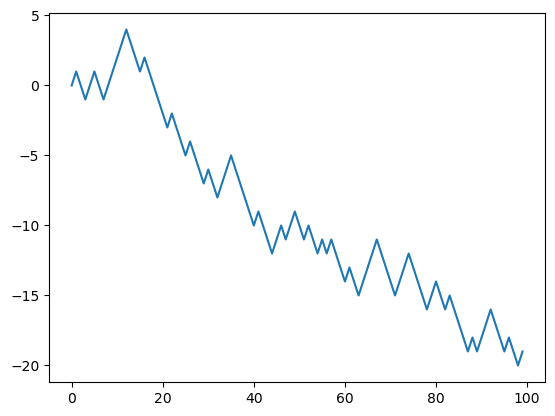

In [127]:
plt.figure()
plt.plot(walk[:100]);

**Vectors**

In [128]:
np.random.seed(12345)

In [130]:
nsteps = 1000
draws = np.random.randint(0, 2, size=nsteps)
steps = np.where(draws > 0, 1, -1)
walk2 = steps.cumsum()

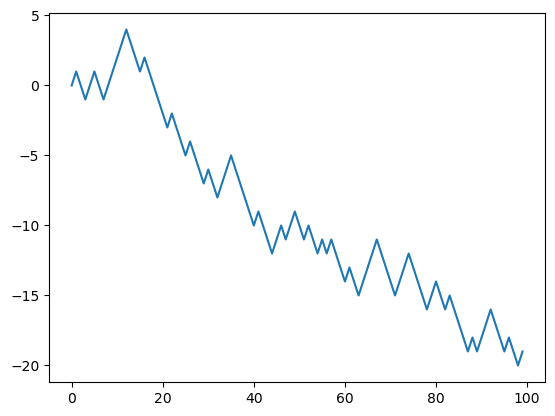

In [131]:
plt.plot(walk[:100]);

In [95]:
walk2.min(), walk2.max()

(-3, 31)

### Simulating Many Random Walks at Once

In [96]:
nwalks = 5000
nsteps = 1000

In [97]:
draws = np.random.randint(0, 2, size=(nwalks, nsteps)) # 0 or 1
steps = np.where(draws > 0, 1, -1)
walks = steps.cumsum(1)

In [98]:
draws

array([[1, 0, 1, ..., 1, 0, 1],
       [1, 0, 0, ..., 0, 0, 0],
       [1, 0, 0, ..., 1, 1, 0],
       ...,
       [1, 1, 0, ..., 0, 1, 1],
       [1, 1, 1, ..., 0, 0, 1],
       [0, 0, 0, ..., 0, 1, 1]])

In [99]:
walks

array([[  1,   0,   1, ...,   8,   7,   8],
       [  1,   0,  -1, ...,  34,  33,  32],
       [  1,   0,  -1, ...,   4,   5,   4],
       ...,
       [  1,   2,   1, ...,  24,  25,  26],
       [  1,   2,   3, ...,  14,  13,  14],
       [ -1,  -2,  -3, ..., -24, -23, -22]])

In [100]:
walks.max(), walks.min()

(138, -133)

In [101]:
hits30 = (np.abs(walks) >= 30).any(1)
hits30

array([False,  True, False, ..., False,  True, False])

In [102]:
hits30.sum() # Number that hit 30 or -30

3410

In [103]:
crossing_times = (np.abs(walks[hits30]) >= 30).argmax(1)
crossing_times.mean()

498.8897360703812

In [104]:
steps = np.random.normal(loc=0, scale=0.25, size=(nwalks, nsteps))

Feel free to experiment with other distributions for the steps other than equal-sized coin flips. You need only use a different random generator method, like standard_normal to generate normally distributed steps with some mean and standard deviation:

In [105]:
draws = 0.25 * rng.standard_normal((nwalks, nsteps)) # Walks: observations, Steps: features

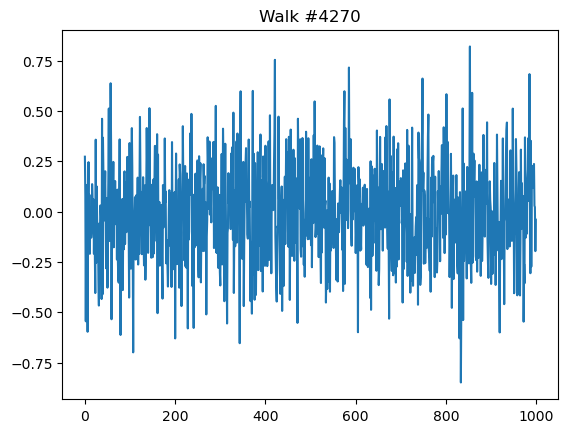

In [106]:
sample_walk = np.random.choice(len(draws))
plt.plot(draws[sample_walk])
plt.title(f"Walk #{sample_walk}");